<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/jwoo428/20230311/%EC%9D%B4%EC%A4%80%EC%9A%B0_%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_6_1%EA%B5%B0%EC%A7%91%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#군집 알고리즘

#핵심 키워드
###비지도 학습
* 머신러닝의 한 종류로 훈련 데이터에 타깃이 없다.
* 타깃이 없기 때문에 외부의 도움없이 스스로 학습해야함
* 대표적인 비지도 학습으로 군집, 차원축소등이 있음
###히스토그램
* 구간별로 값이 발생한 빈도를 그래프로 표시한 것
* x축이 값의 구간이고 y축은 발생 빈도이다.
###군집
* 비슷한 샘플끼리 하나의 그룹으로 모으는 대표적인 비지도 학습 작업이다.
* 군집 알고리즘으로 모은 샘플 그룹을 클러스터라고 부름

###타깃을 모르는 비지도 학습
* 타깃이 없을때 사용하는 머신러닝 알고리즘을 비지도 학습이라고 한다.

* 과일 데이터셋(https://www.kaggle.com/moltean/fruits)

In [12]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-03-11 03:57:35--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-03-11 03:57:35--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-03-11 03:57:36--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
fruits = np.load('fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


In [41]:
print(fruits[0,0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


###imshow()함수 = 넘파이 배열로 저장된 이미지를 쉽게 그릴 수 있음

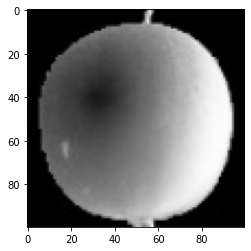

In [42]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

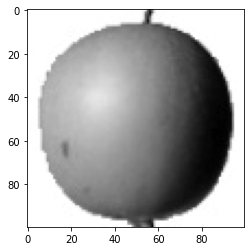

In [43]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

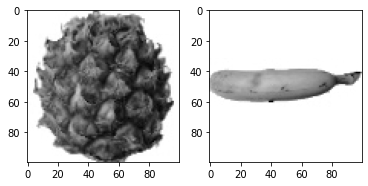

In [44]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

###픽셀값 분석하기

In [45]:
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

In [46]:
print(apple.shape)

(100, 10000)


###axis인수란??
* axis=1이면 열방향으로 계산하고, axis=0이면 행을 따라 계산한다.

In [47]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


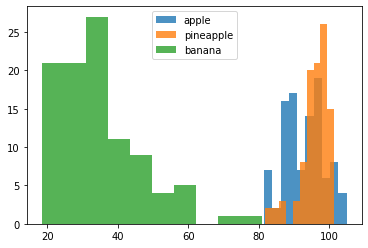

In [48]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

* 바나나 사진의 평균값은 40아래에 집중되어 있음
* 사과와 파인애플은 90~100사이에 모여있음
* 결과적으로 바나나는 픽셀 평균값만으로도 사과나 파인애플하고 확실히 구분됨

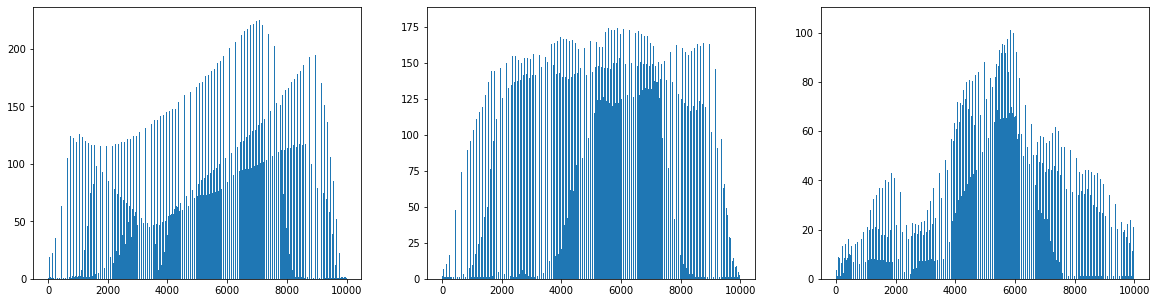

In [49]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple,axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

* 순서대로 사과, 파인애플, 바나나 그래프
* 사과는 사진 아래쪽으로 갈수록 값이 높아지고
* 파인애플은 비교적 고르면서 높다
* 바나나는 확실히 중앙의 픽셀 값이 높다

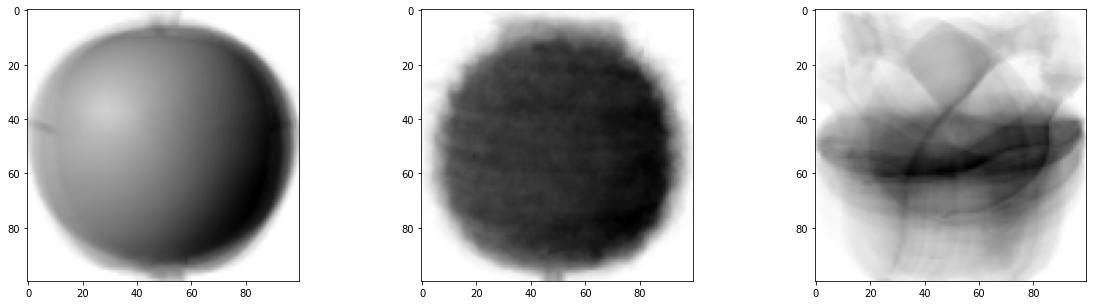

In [50]:
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

###평균값과 가까운 사진 고르기
* 사과 사진의 평균값인 apple_mean과 가장 가까운 사진을 골라보자
* fruits 배열에 잇는 모든 샘플에서 apple_mean을 뺀 절댓값의 평균을 계산하면 된다


In [51]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


* np.argsort() 함수는 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스 반환

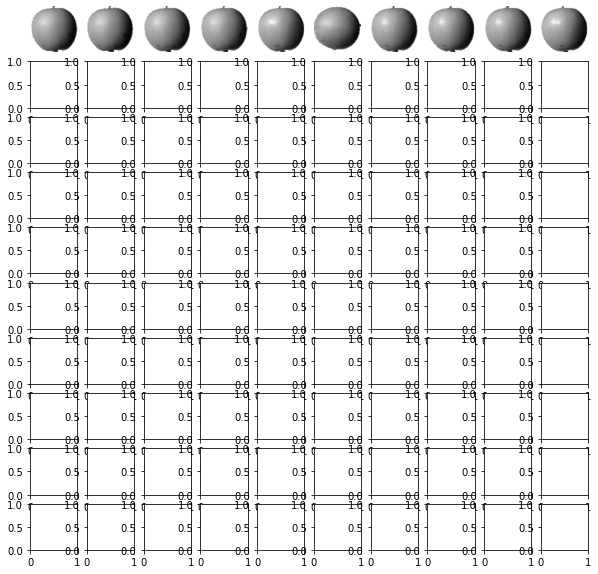

In [52]:
apple_index = np.argsort(abs_mean)[:100]
fig,axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r') 
    axs[i,j].axis('off')
  plt.show()

###밑에 최종코드를 치면 정상적으로 나오는데 왜 밑의 값이 안찍히는지 이유를 잘 모르겠다.

* 비슷한 샘플기리 그룹으로 모으는 작업을 군집이라고 한다.
* 군집 알고리즘에서 만든 그룹을 클러스터라고 부른다.

--2023-03-11 04:34:41--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-03-11 04:34:41--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-03-11 04:34:42--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

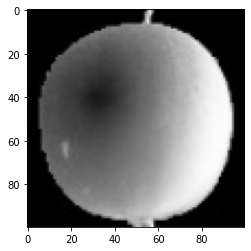

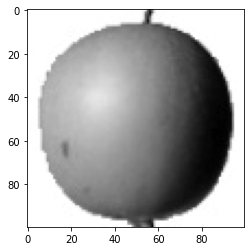

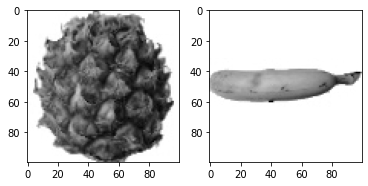

(100, 10000)
[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


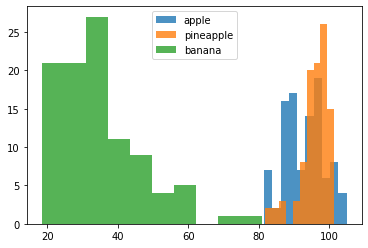

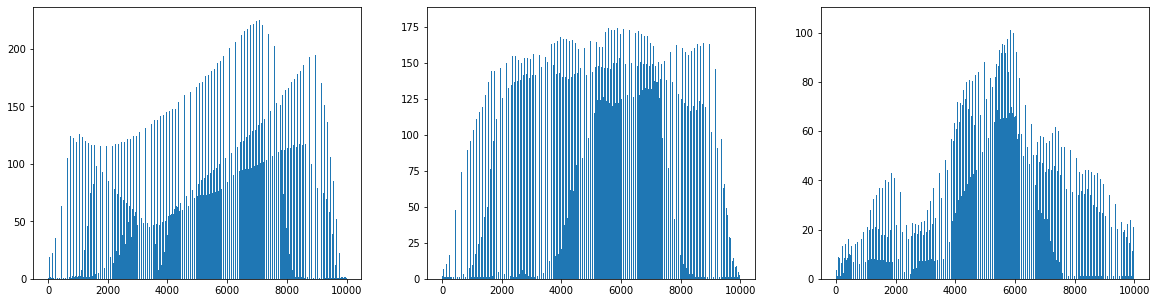

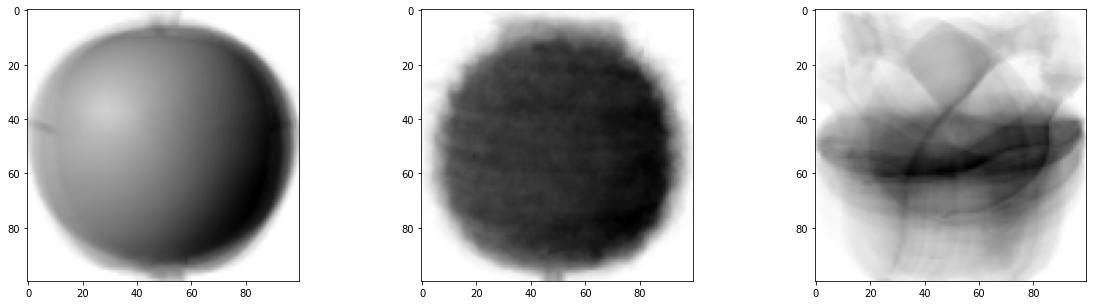

(300,)


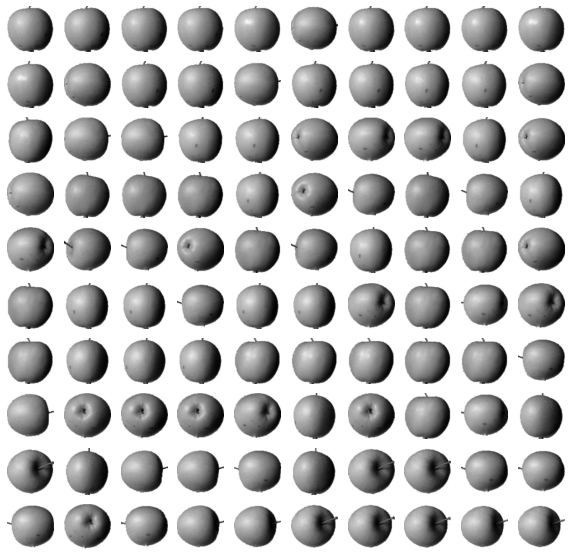

In [53]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')

print(fruits.shape)
print(fruits[0,0,:])
plt.imshow(fruits[0], cmap='gray')
plt.show()

plt.imshow(fruits[0], cmap='gray_r')
plt.show()

fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100],cmap='gray_r')
axs[1].imshow(fruits[200],cmap='gray_r')
plt.show()

# 픽셀값 분석하기

apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)
print(apple.mean(axis=1))

plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1),alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

fig,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()

# 평균값과 가까운 사진 고르기

abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
    axs[i,j].axis('off')
plt.show()